# Custom Scraper

You are free to scrape any website of your choice. The only constraint is that you should have fun while doing it! Pick an interesting site to scrape and analyze its content. Let us know what you find!

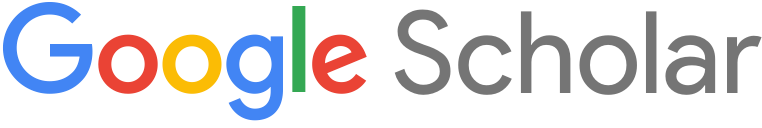

## Google scholar
#### Google scholar is a common platform to scrap literature data at preliminary stage, including getting an initial idea of whether the topic is prominent in the field (i.e., the total no. of literatures), the current trend (i.e., the trend of publications) etc. 
Here I will try to get these information from the current research landscape - keywords = "chatgpt", "human connections". I included only review articles.

1.1. Download all necessary information

In [2]:
# import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
search_kw = 'chatgpt'
search_kw_html = search_kw.replace(" ", "+")

In [ ]:
# <!----> is an HTML comment placeholder (often used in frameworks like Vue or Angular), but BeautifulSoup skips empty comment tags, so .get_text() still returns the inner visible content.

I am interested in the name of first_author (to see if a, and which, person or research group is dominating), the date, title, journal, popularity (cited by), and accessible hyperlink.

In [4]:
# parsing
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
}

In [ ]:
# try
# start_no='10'
# url = f"https://scholar.google.com/scholar?start={start_no}&q=%22chatgpt%22&hl=en&as_sdt=0,5&as_rr=1"
# print(url)
# url = f"https://scholar.google.com/scholar?q=%22chatgpt%22&hl=en&as_sdt=0,5&as_rr=1"


# key words: "chatgpt" "human connections"
url = 'https://scholar.google.com/scholar?start=10&q=%22chatgpt%22+%22human+connection%22&hl=en&as_sdt=0,5&as_rr=1'

page = requests.get(url, headers=headers, timeout=2)    # order soup
soup = BeautifulSoup(page.content, "html.parser")       # cooking soup


In [77]:
page

<Response [200]>

In [ ]:
# page # too many requests sent, see https://www.rfc-editor.org/rfc/rfc6585#page-3

# should adjust to 50 requests per hour -> sleep accordingly.

<Response [429]>

In [8]:
# find title
title = soup.find_all('h3', {'class': 'gs_rt'})  # scoping soup
print(len(title))
title[0].find('a').get_text()

10


'A Conversation with ChatGPT: Philosophy, Critical Thinking, and Higher Education'

In [11]:
# find link
title[0].find('a')['href']

'https://dergipark.org.tr/en/pub/jai/issue/87787/1498257'

In [12]:
author = soup.find_all('div', {'class':"gs_a"})
len(author)
# author[0].get_text()
# author[1].find('a').get_text()

10

In [27]:
[author[i].get_text().split('\xa0-')[0].split(', ')[0] for i in range(10)]


['I Baruwa',
 'B Pani',
 'J Dron',
 'P Arjanto',
 'TTJE Arets',
 'LH Al-Obaydi',
 'A CHALKE',
 'H Ahmari Tehran',
 'Vİ Kavak',
 'SR Shihab']

In [28]:
# find date - year
import re       # package to extract no. from a string  

date = soup.find_all('div', {'class': 'gs_a'})
date[1].get_text(strip=True)
re.findall(r'\d+', date[1].get_text(strip=True))    # output a list
# for i in range(10):
#     print(date[i].get_text(strip=True).split()[-3])

['2024']

In [ ]:
# find journal
# j = soup.find_all('div', {'class': 'gs_a'})

# j[3].get_text().split("\xa0")[1].split('- ')[1]

# j[5].get_text().split("\xa0-")[1].split(',')[0].strip()

# journal too complicated; dropped.

In [55]:
# find cited by
cb = soup.find_all('div', {'class': 'gs_fl gs_flb'})

print([cb[i].get_text().split()[4] for i in range(10)])
[cb[i].get_text().split()[4].isdigit() for i in range(10)]

['2', '39', '23', 'View', 'All', 'All', 'All', 'All', '15', '47']


[True, True, True, False, False, False, False, False, True, True]

In [ ]:
for i in range(10):
    if cb[i].get_text().split()[4].isdigit() == False:
        out = None
    else: 
        out = cb[i].get_text().split()[4]

False

In [56]:
# find date

date = soup.find_all('div', {'class': 'gs_a'})
# date_out = []
# for i in range(10):
    # date[i].get_text(strip=True)
date_out = [date[i].get_text(strip=True).split(", ")[-1].split(" - ")[0] for i in range(10)]
date_out

['2024',
 '2024',
 '2023',
 '2026',
 '2025',
 '2025',
 '2025',
 '2025',
 '2024',
 '2023']

In [ ]:
# try one page
author = soup.find_all('div', {'class':"gs_a"})
author_out = [author[i].get_text().split('\xa0-')[0].split(', ')[0] for i in range(10)]
print(author_out)

title = soup.find_all('h3', {'class': 'gs_rt'}) 
title_out = [title[i].find('a').get_text() for i in range(10)]
print(title_out)

date = soup.find_all('div', {'class': 'gs_a'})
date_out = [date[i].get_text(strip=True).split(", ")[-1].split(" - ")[0] for i in range(10)]
print(date_out)

# cited = soup.find_all('div', {'class': 'gs_fl gs_flb'})
# cited_out = [cited[i].get_text().split()[4] for i in range(10)]
# print(cited_out)

cited_out = []
for i in range(10):
    if cb[i].get_text().split()[4].isdigit() == False:
        cited_out.append('0')
    else: 
        cited_out.append(cb[i].get_text().split()[4])
print(cited_out)

href_out = [title[i].find('a')['href'] for i in range(10)]
print(href_out)

len(author_out), len(title_out), len(date_out), len(cited_out), len(href_out)


['MN Sakib', 'J Dempere', 'S Biswas', 'GG Genelza', 'S Murtiningsih', 'A Adel', 'P Choudhary', 'M Alawida', 'F Vahedifard', 'O Albaloul']
['The ChatGPT and the future of HR: A critical review on the benefits and challenges of Al chatbots in human resource management', 'The impact of ChatGPT on higher education', 'ChatGPT and the future of journal reviews: a feasibility study', 'Unlocking the opportunities and challenges of using ChatGPT tools for educational services: A narrative literature review', 'Challenges of using ChatGPT in education: A digital pedagogy analysis', 'ChatGPT promises and challenges in education: Computational and ethical perspectives', 'Enhancing training by incorporating ChatGPT in learning modules: an exploration of benefits, challenges, and best practices', 'A comprehensive study of ChatGPT: Advancements, limitations, and ethical considerations in natural language processing and cybersecurity', 'Practical use of ChatGPT in psychiatry for treatment plan and psyc

(10, 10, 10, 10, 10)

In [73]:
lit_df = pd.DataFrame(columns=['first_author', 'year', 'title', 'cited_by', 'link'])

In [ ]:
lit_dict = {
    "first_author": author_out,
    "year": date_out,
    "title": title_out,
    "cited_by": cited_out,
    "link": href_out
}
lit_df = pd.concat([lit_df, pd.DataFrame(lit_dict)], ignore_index=True)
lit_df



,first_author,year,title,cited_by,link
0,MN Sakib,2024,The ChatGPT and the future of HR: A critical r...,2,https://www.malque.pub/ojs/index.php/mr/articl...
1,J Dempere,2023,The impact of ChatGPT on higher education,39,https://www.frontiersin.org/journals/education...
2,S Biswas,2023,ChatGPT and the future of journal reviews: a f...,23,https://pmc.ncbi.nlm.nih.gov/articles/PMC10524...
3,GG Genelza,2024,Unlocking the opportunities and challenges of ...,0,https://www.ajol.info/index.php/jet/article/vi...
4,S Murtiningsih,2024,Challenges of using ChatGPT in education: A di...,0,https://www.academia.edu/download/122314366/66...
5,A Adel,2024,ChatGPT promises and challenges in education: ...,0,https://www.mdpi.com/2227-7102/14/8/814
6,P Choudhary,2024,Enhancing training by incorporating ChatGPT in...,0,https://www.researchgate.net/profile/Prity-Cho...
7,M Alawida,2023,A comprehensive study of ChatGPT: Advancements...,0,https://www.mdpi.com/2078-2489/14/8/462
8,F Vahedifard,2023,Practical use of ChatGPT in psychiatry for tre...,15,https://arxiv.org/abs/2311.09131
9,O Albaloul,2024,Unlocking educational potential: How physical ...,47,https://www.tandfonline.com/doi/abs/10.1080/07...


In [92]:
# try multiple pages - a total of 22000 results are obtained. I used only the first 5000 results.
# 10 results -> 1 page; 222 results = 22 pages

import pandas as pd
import numpy as np
import time

lit_df = pd.DataFrame(columns=['first_author', 'year', 'title', 'cited_by', 'link'])


for n in range(0, 220, 10):
    start_no = str(n)
    url = f'https://scholar.google.com/scholar?start={start_no}&q=%22chatgpt%22+%22human+connection%22&hl=en&as_sdt=0,5&as_rr=1'
    time.sleep(5)

    try:
        page = requests.get(url, headers=headers, timeout=10)
    except TimeoutError:
        page = requests.get(url, headers=headers, timeout=30)

    soup = BeautifulSoup(page.content, "html.parser")
    
    for i in range(10):     # 10 articles in each page
        try:
            author = soup.find_all('div', {'class':"gs_a"})
            author_out = author[i].get_text().split('\xa0-')[0].split(', ')[0]
        except AttributeError:
            author_out = None

        try:
            date = soup.find_all('div', {'class': 'gs_a'})
            date_out = date[i].get_text(strip=True).split(", ")[-1].split(" - ")[0]
        except AttributeError:
            date_out = None

        try:
            title = soup.find_all('h3', {'class': 'gs_rt'}) 
            title_out = title[i].find('a').get_text()
        except AttributeError:
            title_out = None
        
        # cited = soup.find_all('div', {'class': 'gs_fl gs_flb'})
        # cited_out = [cited[i].get_text().split()[4] for i in range(10)]
        try:
            if cb[i].get_text().split()[4].isdigit() == False:
                cited_out = '0'         # no cited by
            else: 
                cited_out = cb[i].get_text().split()[4]
        except AttributeError:
            cited_out = None

        try:
            href_out = title[i].find('a')['href']
        except (AttributeError, TypeError, IndexError):
            href_out = None

        lit_dict = {
            "first_author": author_out,
            "year": date_out,
            "title": title_out,
            "cited_by": cited_out,
            "link": href_out
        }

        lit_df = pd.concat(
            [lit_df, pd.DataFrame([lit_dict])], 
            ignore_index=True)      # keeping the index



In [93]:
lit_df

,first_author,year,title,cited_by,link
0,I Baruwa,2024,"A Conversation with ChatGPT: Philosophy, Criti...",2,https://dergipark.org.tr/en/pub/jai/issue/8778...
1,B Pani,2024,Can generative artificial intelligence foster ...,39,https://link.springer.com/chapter/10.1007/978-...
2,J Dron,2023,The human nature of generative AIs and the tec...,23,https://www.mdpi.com/2673-6470/3/4/20
3,P Arjanto,2026,Augmenting Human Connection: A Systematic Revi...,0,https://e-journal.upr.ac.id/index.php/pdhp/art...
4,TTJE Arets,2025,The Role of Generative AI in Facilitating Soci...,0,https://arxiv.org/abs/2506.10927
...,...,...,...,...,...
215,H Jeong,2023,Nonface-to-Face Visitation to Restrict Patient...,0,https://www.i-jmr.org/2023/1/e43572/
216,A Iannone,2024,Breaking barriers—The intersection of AI and a...,0,https://www.mdpi.com/2075-4426/14/1/41?utm_sou...
217,T Hoshi,2024,"Touching with ultrasound, touched by ultrasound",0,https://www.jstage.jst.go.jp/article/jsaprev/2...
218,A Theys,"A Theys,J Hermans",None,15,None


1.2. Using the information obtained, perform a descriptive analysis on this data. You will need to formulate your own questions about what to find the data.

When thinking about the website you would like to scrape and the information you can find from it, keep these points in mind:

* What kind of websites do I frequently visit?


* What type of data on these websites could be interesting to collect?


* What type of data would be interesting in your professional domain? (E.g. healthcare, finance, social media)
    <br> - literature data, publication trends, tracking new publications

* If there is an API for the specific data you are planning to scrape, it’s probably not worth trying to scrape it (E.g. Spotify API)

In [ ]:
# find NA / None
lit_df['title'].isna().sum()        # 3 NA articles -> remove

np.int64(3)

In [99]:
lit_df_clean = lit_df.dropna(subset='title')
lit_df_clean

,first_author,year,title,cited_by,link
0,I Baruwa,2024,"A Conversation with ChatGPT: Philosophy, Criti...",2,https://dergipark.org.tr/en/pub/jai/issue/8778...
1,B Pani,2024,Can generative artificial intelligence foster ...,39,https://link.springer.com/chapter/10.1007/978-...
2,J Dron,2023,The human nature of generative AIs and the tec...,23,https://www.mdpi.com/2673-6470/3/4/20
3,P Arjanto,2026,Augmenting Human Connection: A Systematic Revi...,0,https://e-journal.upr.ac.id/index.php/pdhp/art...
4,TTJE Arets,2025,The Role of Generative AI in Facilitating Soci...,0,https://arxiv.org/abs/2506.10927
...,...,...,...,...,...
214,M Farooq,2024,Artificial Intelligence in Business Communicat...,0,https://books.google.com/books?hl=en&lr=&id=QC...
215,H Jeong,2023,Nonface-to-Face Visitation to Restrict Patient...,0,https://www.i-jmr.org/2023/1/e43572/
216,A Iannone,2024,Breaking barriers—The intersection of AI and a...,0,https://www.mdpi.com/2075-4426/14/1/41?utm_sou...
217,T Hoshi,2024,"Touching with ultrasound, touched by ultrasound",0,https://www.jstage.jst.go.jp/article/jsaprev/2...


In [110]:
# ==== dataframe needs further cleaning at scrapping stage =====

In [104]:
lit_df_clean.describe()

,first_author,year,title,cited_by,link
count,217,217,217,217,217
unique,214,37,217,6,217
top,M Cecconi,2025,"A Conversation with ChatGPT: Philosophy, Criti...",0,https://dergipark.org.tr/en/pub/jai/issue/8778...
freq,2,81,1,108,1


In [108]:
lit_df_clean['year']

0               2024
1               2024
2               2023
3               2026
4               2025
           ...      
214             2024
215             2023
216             2024
217             2024
219    MA Fernandes…
Name: year, Length: 217, dtype: object

In [107]:
# trend of publication
lit_df_clean.groupby('year').count()

,first_author,title,cited_by,link
year,,,,
2000,1,1,1,1
2016,1,1,1,1
2019,1,1,1,1
2022,1,1,1,1
2023,26,26,26,26
2024,75,75,75,75
2025,81,81,81,81
2026,1,1,1,1
A Utkirov- 2024,1,1,1,1


1.3. Produce a report in the form of a clean notebook (or jupyter slides), with commented code and markdown cells for structuring and interpretations.